In [10]:
from curaitor import aestheticevaluator
from curaitor.utils.downloader import download_file
from glob import glob
from PIL import Image
import ipyplot

In [2]:
# Download the model checkpoint
model_checkpoint_url = 'https://objectstorage.eu-frankfurt-1.oraclecloud.com/n/frwwzrj6ghal/b/thesis/o/resnet50_model_batch_size(512)_learning_rate(0.0002)_l2_norm_(0.0)_lr_scheduler_factor(0.2)_lr_scheduler_patience(8)_lr_scheduler_min_lr(1e-11)_gradient_clip_val(1)_stochastic_weight_avg(True)_epochs(50).ckpt'

path_to_checkpoint = download_file(model_checkpoint_url, './')

In [3]:
# Initialize model
model = aestheticevaluator.initialize_model(path_to_checkpoint=path_to_checkpoint)

c:\users\r\pycharmprojects\curaitor\venv-xmp\lib\site-packages\numpy\core\_asarray.py:102: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order)



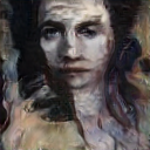
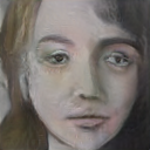
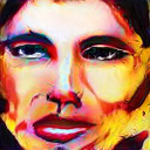
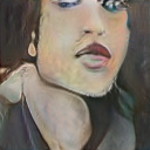
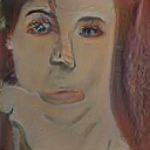
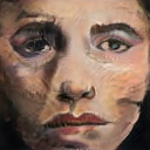
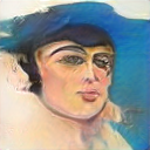
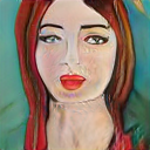
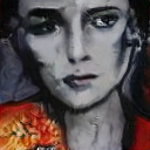
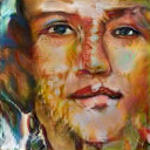
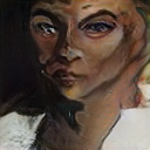
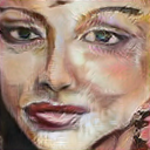
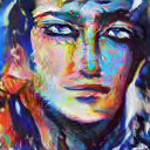
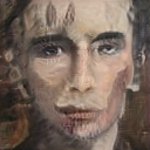
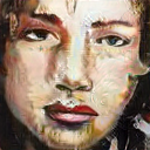
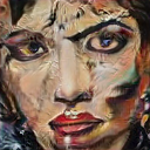
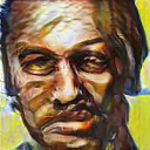
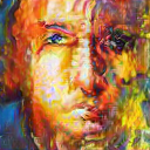
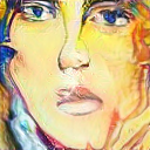
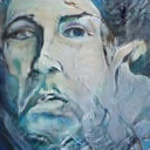
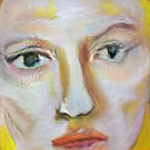


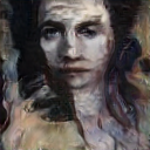
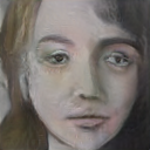
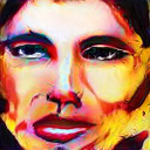
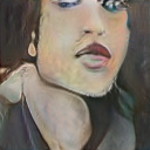
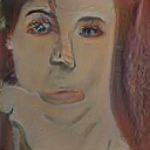
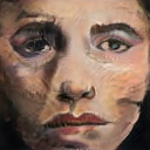
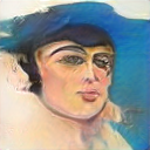
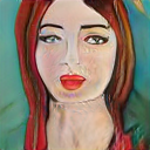
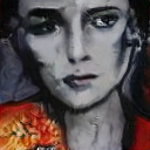
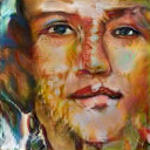
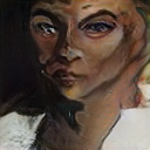
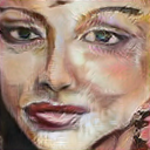
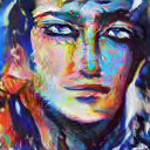
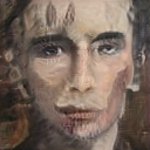
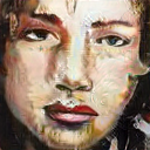
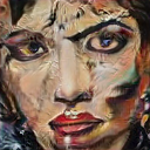
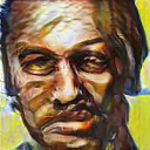
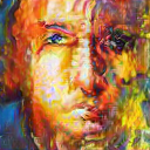
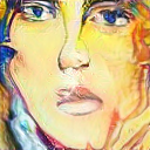
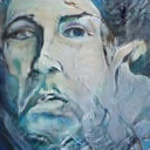
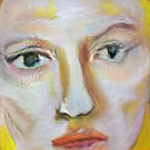

In [22]:
# Load images
files = glob('./sample_images/*.*')

# View a couple of images
ipyplot.plot_images([Image.open(file) for file in files])

In [26]:
# Predict the classes to which the images belong
# The model takes a list of image paths as input
predictions = model(files)

# The model outputs both the class probabilities and the class predictions
class_predictions = predictions['class_predictions']
class_probabilities = predictions['class_probabilities']

In [27]:
# View the class predictions
# As none of the images is very aesthetic, the model rightly assigns a low classses for the majority of them
print(class_predictions)

tensor([1, 3, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2])


In [32]:
# The class probabilities consist of the softmaxed outputs of the model predictions:
print(class_probabilities)






tensor([[1.6932e-07, 1.0000e+00, 2.6182e-06, 4.7636e-12, 7.9710e-15],
        [2.4098e-02, 1.8457e-03, 1.1598e-03, 9.7283e-01, 6.6556e-05],
        [1.0000e+00, 9.5292e-22, 1.1005e-24, 2.2633e-28, 4.3365e-28],
        [7.9228e-07, 3.6252e-07, 9.9997e-01, 5.0640e-06, 2.7304e-05],
        [9.9870e-01, 6.9327e-04, 5.9952e-04, 2.9353e-06, 1.0390e-07],
        [1.3449e-03, 4.0572e-06, 9.9865e-01, 5.9379e-12, 2.5364e-10],
        [1.0826e-09, 3.3660e-11, 1.0000e+00, 3.0353e-08, 3.4883e-09],
        [9.6022e-01, 2.0176e-02, 3.7606e-10, 1.9605e-02, 9.1620e-09],
        [1.0000e+00, 1.0808e-21, 4.2212e-18, 1.0687e-19, 1.1627e-20],
        [6.1200e-12, 1.0000e+00, 2.2964e-16, 6.6099e-16, 2.0190e-16],
        [2.2840e-08, 5.7312e-12, 9.3114e-01, 6.8857e-02, 1.9967e-11],
        [1.0252e-01, 3.1072e-10, 8.9748e-01, 7.3631e-08, 1.9745e-07],
        [9.9634e-01, 1.5033e-06, 5.7503e-06, 5.9596e-04, 3.0577e-03],
        [1.5462e-07, 7.4063e-10, 9.9998e-01, 2.3591e-06, 1.7369e-05],
        [2.0865e-10,